<a href="https://colab.research.google.com/github/nkiru-ede/nkiru_codes/blob/master/Assessment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from datetime import time
from datetime import datetime
import seaborn as sns
import matplotlib.font_manager
from itertools import cycle, islice



In [ ]:
import json

credentials={}

credentials['CONSUMER_KEY'] = ''
credentials['CONSUMER_SECRET'] = ''
credentials['ACCESS_TOKEN'] = ''
credentials['ACCESS_SECRET'] = ''

with open("twitter_credentials.json", "w") as file:
    json.dump(credentials, file)

In [ ]:
pip install twython

In [ ]:
import numpy as np
import tweepy
import requests
import base64

In [ ]:
#Sources we can trust - verified status
from twython import Twython
import json

with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)
   
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])


#query = {'q': 'COVID-19 Vaccine',
       #'result_type': 'popular', 'count': 100, 'lang': 'en',}

query = {'q': 'Ghana',
         'result_type': 'mixed',
         'count': 100, 'lang': 'en', 'until': '2022-03-24'}
sample_return = python_tweets.search(**query)


dict_={'user': [],'Verified_status':[]}
for status in python_tweets.search(**query) ['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['Verified_status'].append(status['user']['verified'])
df = pd.DataFrame(dict_)
df.sort_values(by='Verified_status', inplace = True, ascending =False)
df 

,user,Verified_status


In [ ]:
#Sources we can trust - followers count
from twython import Twython
import json
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)
  python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
query = {'q': 'Ghana',
         'result_type': 'mixed',
         'count': 100, 'lang': 'en', 'until': '2022-03-24'}
sample_return = python_tweets.search(**query)
dict_={'user': [], 'followers_count':[]}
for status in python_tweets.search(**query) ['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['followers_count'].append(status['user']['followers_count'])
df = pd.DataFrame(dict_)
df.sort_values(by='followers_count', inplace = True, ascending =False)
df = df.head(10)
df

In [ ]:
#sources to trust -followers count - word cloud
allWords = ' '.join([twts for twts in df['user']])
wordCloud = WordCloud(width = 500, height = 300, background_color= 'white' ,random_state = 21, max_font_size = 209).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
my_colors = list(islice((['b', 'r', 'g', 'y', 'k']), len(df)))
barC = df.plot(kind = 'bar', x='user', y='followers_count',rot=90, figsize=(16, 8),stacked=True, color = my_colors, legend=False)
barC.set_title("Users Followers Count")
barC.set_ylabel("Number of Followers")

In [ ]:
#Get Trends by Location - South Africa (25/03/2022)
import json
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)  
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
PlaceTrends = python_tweets.get_place_trends(id = 23424942)
import pandas as pd
dict_ = {'query': [], 'Hashtag': [], 'tweet_volume': [], 'promoted_content' : [],'url': [],'location':[] }
for status in PlaceTrends[0] ['trends']:
   dict_['query'].append(status['query'])
   dict_['Hashtag'].append(status['name'])
   dict_['tweet_volume'].append(status['tweet_volume'])
   dict_['promoted_content'].append(status['promoted_content'])
   dict_['url'].append(status['url'])
   dict_['location'].append(status['location'])
   df = pd.DataFrame(dict_)
df.sort_values(by='tweet_volume', inplace = True, ascending =False)
df

In [ ]:
#display tweet volume and hashtag only
#Get Trends by Location
import json
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)
   
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
PlaceTrends = python_tweets.get_place_trends(id = 23424942
)
import pandas as pd
dict_ = {'tweet_volume': [],'Hashtag': []}
for status in PlaceTrends[0] ['trends']:
   dict_['tweet_volume'].append(status['tweet_volume'])
   dict_['Hashtag'].append(status['name'])
   df = pd.DataFrame(dict_)
df.sort_values(by='tweet_volume', inplace = True, ascending =False)

df

In [ ]:
#cleaning the data - removing '#'
def cleanTxtH(cTx):
  cTx = re.sub(r'#', '', cTx) #remove the '#' symbol
  return cTx
#cleaning the text
df['Hashtag'] = df['Hashtag'].apply(cleanTxtH)
#Remove records with hashtag = NaN
df = df.dropna()
#show the cleaned text
df

In [ ]:
#Popular trends in south africa - word cloud
allWords = ' '.join([twts for twts in df['Hashtag']])
wordCloud = WordCloud(width = 500, height = 300, background_color= 'white' ,random_state = 21, max_font_size = 209).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

100
100
100
100
100
100
100
100


[Text(0.5, 1.0, 'Trending Topic in the South Africa')]

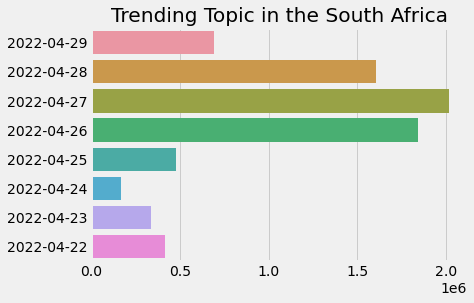

In [ ]:
#When trends started in each place - using retweet counts

from twython import Twython
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

with open("twitter_credentials.json", "r") as file:

  creds=json.load(file)

python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])

dates =["2022-04-29","2022-04-28","2022-04-27","2022-04-26","2022-04-25","2022-04-24","2022-04-23","2022-04-22"]

dict_test = {'user':[], 'date':[], 'text':[], 'favorite_count': [], 'location': [], 'verified':[], 
         'protected':[], 'retweet':[], 'source':[], 'coordinates':[], 'timezone':[],
         'geo':[], 'place':[], 'Followers':[], 'Account Created': [],'is_retweet':[] }
tweets = []
for i in dates:

  query = {'q' : 'elon musk',
  'result_type' : 'mixed',
  'count' : 100, 'lang' : 'en', "until":i}
  sample_return = python_tweets.search(**query)
  tweets.append(sample_return['statuses'])
  for status in python_tweets.search(**query)['statuses']:
        dict_test['user'].append(status['user']['screen_name'])
        dict_test['date'].append(status['created_at'])
        dict_test['text'].append(status['text'])
        dict_test['favorite_count'].append(status['favorite_count'])
        dict_test['location'].append(status['user']['location'])
        dict_test['verified'].append(status['user']['verified'])
        dict_test['protected'].append(status['user']['protected'])
        dict_test['retweet'].append(status['retweet_count'])
        dict_test['source'].append(status['source'])
        dict_test['coordinates'].append(status['coordinates'])
        dict_test['timezone'].append(status['user']['time_zone'])
        dict_test['geo'].append(status['geo'])
        dict_test['place'].append(status['place'])
        dict_test['Followers'].append(status['user']['followers_count'])
        dict_test['Account Created'].append(status['user']['created_at'])
        dict_test['is_retweet'].append(status['retweeted'])
  #tweets = tweets + sample_return['statuses']
  print(len(sample_return['statuses']))

#df = pd.DataFrame(tweets)
dfs =[]
for i in tweets:
  dfs.append(pd.DataFrame(i))

  totals=[]
for i in dfs:
  totals.append(i["retweet_count"].sum())

sns.barplot(y=dates, x=totals).set(title="Trending Topic in the South Africa")

In [ ]:
#sentiment analysis
df_test2 = pd.DataFrame(dict_test)
tweet =  df_test2.text
df = pd.DataFrame(tweet)
df

,text
0,So let me get this straight: conservatives lov...
1,The government is so afraid of Elon Musk ownin...
2,Texas man offers Elon Musk 100 acres of FREE l...
3,RT @DanSanchezV: Elon Musk buys Twitter to sav...
4,RT @DanSanchezV: Elon Musk buys Twitter to sav...
...,...
795,RT @TheInsiderPaper: JUST IN - Elon Musk says ...
796,RT @ScottPresler: Ever notice that democrats c...
797,@sammiejo_eh @ma3una And of course as soon as ...
798,RT @CarbonCriminal: Elon Musk goes up in my es...


In [ ]:
#Clean text - sentiment analysis

def cleantext(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
  text = re.sub(r'#','', text) # removes #
  text = re.sub(r'RT[\s]+', '', text)#removes RT
  text = re.sub(r'https?:/\/\S+', '', text)#removes hhtp
  return text
df['text'] = df['text'].apply(cleantext)
df

,text
0,So let me get this straight: conservatives lov...
1,The government is so afraid of Elon Musk ownin...
2,Texas man offers Elon Musk 100 acres of FREE l...
3,: Elon Musk buys Twitter to save free speech a...
4,: Elon Musk buys Twitter to save free speech a...
...,...
795,: JUST IN - Elon Musk says he will get rid off...
796,: Ever notice that democrats complain about El...
797,_eh And of course as soon as the WEF members ...
798,: Elon Musk goes up in my estimations every day.


In [ ]:
#Create a function to get the subjectivity
#subjectivity - tells how subjective the text/opinion is
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
#polarity tells how positive or negative a text is
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
 
#create two new columns
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

#show the new dataframe
df

,text,Subjectivity,Polarity
0,So let me get this straight: conservatives lov...,0.700000,0.14
1,The government is so afraid of Elon Musk ownin...,0.600000,-0.20
2,Texas man offers Elon Musk 100 acres of FREE l...,0.533333,0.30
3,: Elon Musk buys Twitter to save free speech a...,0.400000,0.20
4,: Elon Musk buys Twitter to save free speech a...,0.400000,0.20
...,...,...,...
795,: JUST IN - Elon Musk says he will get rid off...,0.950000,0.75
796,: Ever notice that democrats complain about El...,0.000000,0.00
797,_eh And of course as soon as the WEF members ...,0.000000,0.00
798,: Elon Musk goes up in my estimations every day.,0.000000,0.00


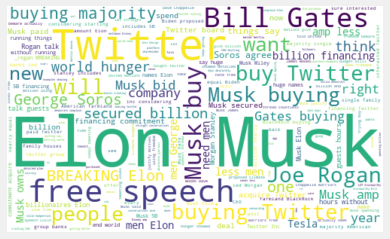

In [ ]:
#plot the wordCloud - sentiment analysis
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width = 500, height = 300, background_color= 'white' ,random_state = 21, max_font_size = 209).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative, neautral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,text,Subjectivity,Polarity,Analysis
0,So let me get this straight: conservatives lov...,0.700000,0.14,Positive
1,The government is so afraid of Elon Musk ownin...,0.600000,-0.20,Negative
2,Texas man offers Elon Musk 100 acres of FREE l...,0.533333,0.30,Positive
3,: Elon Musk buys Twitter to save free speech a...,0.400000,0.20,Positive
4,: Elon Musk buys Twitter to save free speech a...,0.400000,0.20,Positive
...,...,...,...,...
795,: JUST IN - Elon Musk says he will get rid off...,0.950000,0.75,Positive
796,: Ever notice that democrats complain about El...,0.000000,0.00,Neutral
797,_eh And of course as soon as the WEF members ...,0.000000,0.00,Neutral
798,: Elon Musk goes up in my estimations every day.,0.000000,0.00,Neutral


In [ ]:
#print all positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
 if (sortedDF['Analysis'][i] == 'Positive'):
   print(str(j) + ')'+sortedDF['text'][i])
   print()
   j=j+1

1)So let me get this straight: conservatives love free speech for Elon Musk, but hate free speech for Colin Kaepernick?

2)Texas man offers Elon Musk 100 acres of FREE land to move Twitter's headquarters.

I will declare it a "Free Speech… 

3): Elon Musk buys Twitter to save free speech and days later President Biden announces a Ministry of Truth.

It's like we're…

4): Elon Musk buys Twitter to save free speech and days later President Biden announces a Ministry of Truth.

It's like we're…

5): So let me get this straight: conservatives love free speech for Elon Musk, but hate free speech for Colin Kaepernick?

6): Elon Musk is funny and I think that makes the libs even more angry

7): elon                       tesla
musk                  autopilot
                 🤝
        unfortunately
      not pum…

8): Elon Musk could do a lot of things with $44B but buying Twitter and seeing libs absolutely lose their minds is worth every…

9): NEW: Elon Musk's pitch to bankers included plans

In [ ]:
#print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+')'+sortedDF['text'][i])
    print()
    j=j+1

1)The government is so afraid of Elon Musk owning Twitter that they literally created a real life Ministry of Truth l… 

2)What if Democrats play hardball, get crushed in November because voters think they're incompetent imbeciles, and th… 

3)I think Elon Musk, should buy Facebook, it seriously needs an overhaul!!

4) Elon Musk is a sociopath, drunk on power, who has surrounded himself with yes men who cater to his eve… 

5)  Dick. You really need to learn a little about Elon Musk! Try researching some of his achievements… 

6): Bill Gates is buying up the majority of American farmland and BlackRock is buying the majority of single family houses…

7)Hello Twitter world, this moron that I am posting a picture of below just got his account shut down because he told… 

8): If Elon Musk had bad intentions he could have simply purchased Congress for a fraction of the price.

9): I couldn’t care less what Elon Musk does with his money. He’s a private citizen. 

I care what this administrati

In [ ]:
#print the neutral tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j)+')'+sortedDF['text'][i])
    print()
    j=j+1

1)I LOST 2 FOLLOWERS (!) THEY MUST NOT BE ELON MUSK SIMPS

2): I never tweet about Elon Musk because I read the time Azealia Banks called him Apartheid Clyde and felt like that was t…

3): Bought Dream for $44 billion.
Elon Musk, CEO of Twitter.
TwitterSold Congrats! ElonMusk 

4)Elon Musk for president  🇺🇸 

5): Breakingviews: Elon Musk probably won’t buy Twitter | Reuters 

6): If Elon Musk ends up withdrawing his bid to purchase Twitter, I will never stop laughing.

7): BREAKING — Elon Musk has appointed Tom Anderson CEO of Twitter 

8): Elon Musk Just FIRED The Twitter Board!  via 

9)   Yeah. Because we all know Elon Musk sees his employees as simple livestock.

10)_ladka: Elon Musk should buy Lays and put chips inside instead of air.

11)shoutout Elon musk !

12): Now that Elon Musk has shared his deep thoughts on asymmetric polarization polarization, I'd like to pass along my equally…

13): Remember that time Elon Musk told the UN if you give me a budgeted breakdown of how $6B w

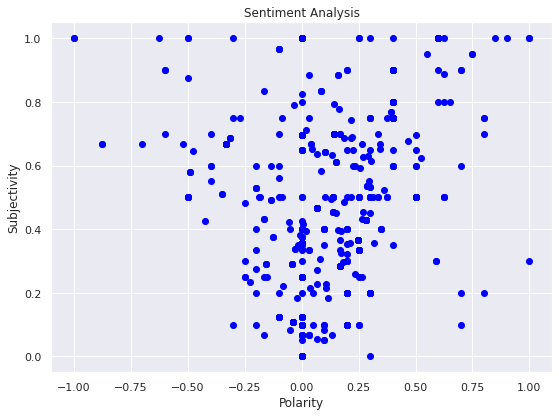

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


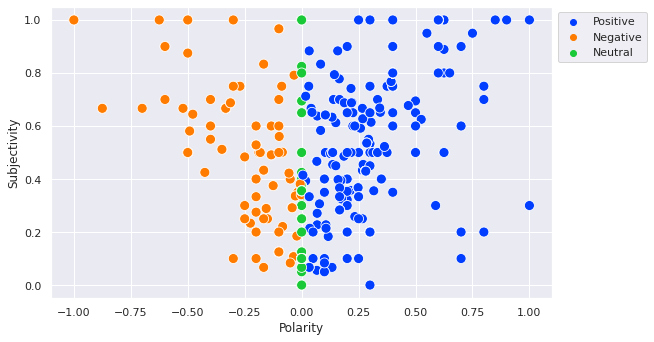

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")    
fig, ax = plt.subplots(figsize=(8, 5))    
palette = sns.color_palette("bright", 3)
g = sns.scatterplot(ax=ax, x="Polarity", y="Subjectivity", hue="Analysis", marker='o', data=df, s=100, palette= palette)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
#g.set(xlim = (50000,250000))

In [ ]:
#get the percentage of positive tweets
ptweets = df[df.Analysis=='Positive']
ptweets = ptweets['text']
ptweets
round( (ptweets.shape[0] /df.shape[0]) * 100 , 1)

43.6

In [ ]:
#get the percentage of negative tweets
ntweets = df[df.Analysis=='Negative']
ntweets = ntweets['text']
ntweets
round( (ntweets.shape[0] /df.shape[0]) * 100 , 1)

14.4

In [ ]:
#get the percentage of neutral tweets
nntweets = df[df.Analysis=='Neutral']
nntweets = nntweets['text']
nntweets
round( (nntweets.shape[0] /df.shape[0]) * 100 , 1)

42.0

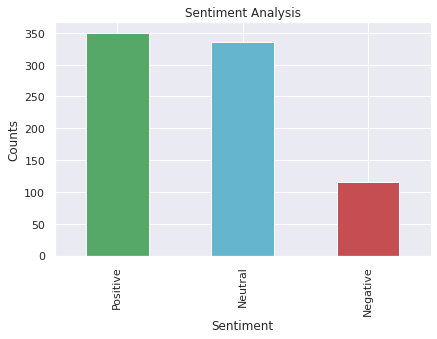

In [ ]:
#show the value count
df['Analysis'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar', color = list('gcrymc'))

plt.show()


In [ ]:
#NewsAPI
import pprint
import requests
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
url = "https://newsapi.org/v2/top-headlines?"
secret = "b770f2b8f56c4f648eac0af08dacf757"
parameters ={
    'q': 'elon musk',
    'pagesize': 100,
    'apikey': secret,
    #'country': 'gb'
}
response = requests.get(url, params = parameters)

response_json = response.json()
pprint.pprint(response_json)

response_dict = {'author':[], 'source name':[], 'title':[], 'description':[], 'url':[], 'content':[]}


In [ ]:
for status in response_json['articles']:
    response_dict['author'].append(status['author'])
    response_dict['source name'].append(status['source']['name'])
    response_dict['title'].append(status['title'])
    response_dict['description'].append(status['description'])
    response_dict['url'].append(status['url'])
    response_dict['content'].append(status['content'])
    
ff = pd.DataFrame(response_dict)
ff.head(8)

In [ ]:
url_everything = "https://newsapi.org/v2/everything?"
parameters_everything ={
    'q': 'Can Twitter become more profitable under Elon Musk?',
    'pagesize': 20,
    'apikey': secret
}
response_everything = requests.get(url_everything, params = parameters_everything)

response_json_everything = response_everything.json()
#pprint.pprint(response_json)

for i in response_json_everything['articles']:
   content =  print(i['content'])


In [ ]:
pip install beautifulsoup4

In [ ]:
pip install requests

In [ ]:
#scrap html content from a page
import requests

URL = "https://www.news24.com/fin24/Companies/ICT/can-twitter-become-more-profitable-under-elon-musk-20220427"
page = requests.get(URL)

print(page.text)

In [ ]:
from bs4 import BeautifulSoup
import requests
# importing the libraries
from bs4 import BeautifulSoup
import requests

url="https://www.news24.com/fin24/Companies/ICT/can-twitter-become-more-profitable-under-elon-musk-20220427"

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse the html content
soup = BeautifulSoup(html_content, "lxml")
print(soup.prettify()) # print the parsed data of html

In [ ]:
print(soup.title)

<title>Can Twitter become more profitable under Elon Musk? | Fin24</title>


In [ ]:
print(soup.title.text)

Can Twitter become more profitable under Elon Musk? | Fin24


In [ ]:
for link in soup.find_all("a"):
    print("Inner Text: {}".format(link.text))
    print("Title: {}".format(link.get("title")))
    print("href: {}".format(link.get("href")))

In [ ]:
gdp_table = soup.find("table", attrs={"class": "wikitable"})
gdp_table_data = gdp_table.tbody.find_all("tr")  # contains 2 rows

# Get all the headings of Lists
headings = []
for td in gdp_table_data[0].find_all("td"):
    # remove any newlines and extra spaces from left and right
    headings.append(td.b.text.replace('\n', ' ').strip())

print(headings)

In [ ]:
# Create an empty string
text_combined = ''
# Loop through all the headlines and add them to 'text_combined' 
for i in response_json_everything['articles']:
    text_combined += i['title'] + ' ' # add a space after every headline, so the first and last words are not glued together
# Print the first 300 characters to screen for inspection
print(text_combined[0:300])

Elon Musk Offers to Buy Twitter for $43 Billion: 'It's a High Price and Your Shareholders Will Love It' How Dorsey Quit TWITTER to Become Bitcoin's Spiritual Leader... Elon Musk touts free speech. What exactly does that mean? Elon Musk's paradoxical vision of running Twitter: Less democracy, more fr


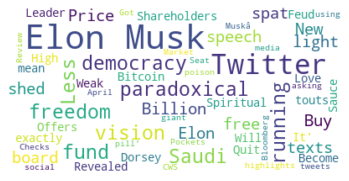

In [ ]:
wordcloud = WordCloud(max_font_size=40, background_color='white').generate(text_combined)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
















for i in response_json_everything:
    response = requests.get(url = i)
    page_content = response.text
    with open('./google.html', 'w', encoding='utf8') as fp:
        fp.write(page_content)
        
with open("") as fp:
    soup = BeautifulSoup(fp, "html.parser")

In [ ]:
#when #Ghana started trending in South Africa - using Retweet count
from twython import Twython
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

with open("twitter_credentials.json", "r") as file:
  creds=json.load(file)
  python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
  TrendDates =["2022-04-26","2022-04-25","2022-04-24","2022-04-23","2022-04-22","2022-04-21","2022-04-20","2022-04-19"]
  tweets = []
for i in TrendDates:
  query = {'q' : 'elon musk',
  'result_type' : 'mixed',
  'count' : 100, 'lang' : 'en', "until":i}
  sample_return = python_tweets.search(**query)
  tweets.append(sample_return['statuses'])
  print(len(sample_return['statuses']))
dfs =[]
for i in tweets:
  dfs.append(pd.DataFrame(i))
  totals=[]
for i in dfs:
  totals.append(i['retweet_count'].sum())

sns.barplot(y=TrendDates, x=totals).set(title="Twitter Trends in South Africa(Trend Dates/Retweet Count)")

In [ ]:
#when #Ghana started trending in South Africa - using favourite count
from twython import Twython
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
with open("twitter_credentials.json", "r") as file:
  creds=json.load(file)
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
TrendDates =["2022-04-26","2022-04-25","2022-04-24","2022-04-23","2022-04-22","2022-04-21","2022-04-20","2022-04-19"]
tweets = []
for i in TrendDates:
  query = {'q' : 'elon musk',
  'result_type' : 'mixed',
  'count' : 100, 'lang' : 'en', "until":i}
  sample_return = python_tweets.search(**query)
  tweets.append(sample_return['statuses'])
  #tweets = tweets + sample_return['statuses']
  print(len(sample_return['statuses']))
dfs =[]
for i in tweets:
  dfs.append(pd.DataFrame(i))
  totals=[]
for i in dfs:
  totals.append(i["favorite_count"].sum())

plt = sns.barplot(y=TrendDates, x=totals).set(title="Twitter Trends in South Africa(Trend Dates/Favorite Count)")




In [ ]:
#when trend started in each place - using retweet count and favourite count
response = []
for i in dates:
  query = {'q' : 'elon musk', 'result_type' : 'mixed', 'count' : 100, 'lang' : 'en', "until":i}
  sample_return = python_tweets.search(**query)
  response.append(sample_return['statuses'])
  print(len(sample_return['statuses']))
#from Dictionary to DataFrame
dfs =[]
for i in response:
  dfs.append(pd.DataFrame(i))
#retweet and favorite count
favorite=[]
retweet=[]
for i in dfs:
  retweet.append(i["retweet_count"].sum())
  favorite.append(i["favorite_count"].sum())
datess = dates + dates
values = favorite + retweet
label = []
for i in range (8):
  label.append("Favorite")
for i in range (8):
  label.append("Retweet")
toPlot = list(zip(datess,values, label))
toPlot_final = pd.DataFrame(toPlot, columns = ['Tweet_Dates', 'Favorite&Retweet_Count', 'Type'])
sns.barplot(x="Favorite&Retweet_Count", y = "Tweet_Dates", hue = "Type", data = toPlot_final).set(title="Retweet and Favorite Count")

In [ ]:
#popular trends in Nigeria - Barchart
my_colors = list(islice((['b', 'r', 'g', 'y', 'k']), len(df)))
barC = df.plot(kind = 'bar', x='Hashtag', y='tweet_volume',rot=90, figsize=(16, 8),stacked=True, color = my_colors, legend=False)
barC.set_title("Popular Trends in South Africa")
barC.set_ylabel("Tweet Volume")

In [ ]:
retweet

[514137, 123885, 30079, 48970, 58603, 55797, 110213, 97997]

In [ ]:
favorite

[21318, 9887, 58885, 59240, 58812, 40268, 71731, 35220]

In [ ]:
#when trend started in each place - using retweet count and favourite count (Stacked bar!)
import pandas as pd

#create DataFrame
df = pd.DataFrame({"retweet_count": [514137, 123885, 30079, 48970, 58603, 55797, 110213, 97997],
"dates" : ["2022-03-25","2022-03-24","2022-03-23","2022-03-22","2022-03-21","2022-03-20","2022-03-19","2022-03-18"],
 "favorite_count": [21318, 9887, 58885, 59240, 58812, 40268, 71731, 35220]})
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
df.set_index('dates').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

#add overall title
plt.title('Retweet/Favorite Count', fontsize=16)

#add axis titles
plt.xlabel('Tweet Date')
plt.ylabel('Retweet/Favorite Count')

#rotate x-axis labels
plt.xticks(rotation=45)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({"": [OverTime,MonthlyIncome, StockOptionLevel],
"" : ["14%", "14%", "12%"],

In [ ]:
#What devices were used to tweet?
from twython import Twython
import json
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)   
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
#query = {'q': 'COVID-19 Vaccine',
       #'result_type': 'popular', 'count': 100, 'lang': 'en',}
query = {'q': 'Ghana',
         'result_type': 'mixed',
         'count': 100, 'lang': 'en', 'until': '2022-03-24'}
sample_return = python_tweets.search(**query)
dict_={'user': [], 'date':[], 'text': [], 'source': []}
for status in python_tweets.search(**query) ['statuses']:
    dict_['user'].append(status['user']['screen_name'])
    dict_['date'].append(status['created_at'])
    dict_['text'].append(status['text'])
    dict_['source'].append(status['source'])
df = pd.DataFrame(dict_)
#df.sort_values(by='favorite_count', inplace = True, ascending =False)
#df.head(5)
df
#cleaning the data 
def cleanTxt(cTx):
  cTx = re.sub(r'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'iphone', cTx) #Remove @mentions
  cTx = re.sub(r'<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>', 'iPad', cTx)
  cTx = re.sub(r'<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'Twitter Web App', cTx)
  cTx = re.sub(r'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', cTx)
  cTx = re.sub(r'<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>', 'Twitter Media Studio', cTx)
  cTx = re.sub(r'<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'Andriod', cTx)
  cTx = re.sub(r'<a href="http://publicize.wp.com/" rel="nofollow">WordPress.com</a>', 'WordPress', cTx)
  #cTx = re.sub(r'<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>', 'Twitter Media Studio', cTx)
  #cTx = re.sub(r'<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>', 'Twitter Media Studio', cTx)
  return cTx
#cleaning the text
df['source'] = df['source'].apply(cleanTxt)
#show the cleaned text
df



,user,date,text,source


In [ ]:
#iPhone
df_filtered = df[(df['source']=='iphone')]
df_filtered

#98

In [ ]:
#Twitter Web App
df_filtered = df[(df['source']=='Twitter Web App')]
df_filtered
#19

In [ ]:
#TweetDeck
df_filtered = df[(df['source']=='TweetDeck')]
df_filtered
#1

,user,date,text,source


In [ ]:
#wordPress
df_filtered = df[(df['source']=='WordPress')]
df_filtered
#1

,user,date,text,source
94,sportnewsblogd1,Wed Mar 23 23:54:16 +0000 2022,"Ghana vs Nigeria prediction, preview, team new...",WordPress


In [ ]:
#iPad
df_filtered = df[(df['source']=='iPad')]
df_filtered
#5

,user,date,text,source


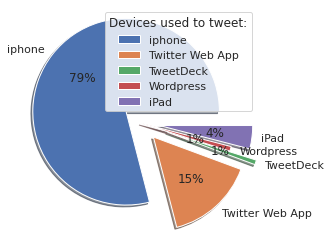

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#define data
y = np.array([98, 19, 1, 1, 5])
mylabels = ['iphone', 'Twitter Web App', 'TweetDeck', 'Wordpress', 'iPad']
myexplode = [0.2, 0.2, 0.3, 0,0.2]

#create piechart
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True,autopct='%.0f%%')
plt.legend(title = "Devices used to tweet:")
plt.show() 

In [ ]:
#What sources can you trust?
#Verified status and followers count



In [ ]:
pip install gmplot

     |████████████████████████████████| 164 kB 11.3 MB/s 


from twython import TwythonStreamer
import csv

def process_tweet(tweet):
    d = {}
    d['hashtags'] = [hashtag['text'] for hashtag in tweet ['entities']['hashtags']]
    d['text'] = tweet['text']
    d['user'] = tweet['user']['screen_name']
    d['user_loc'] = tweet['user']['location']
 
    return d

class MyStreamer (TwythonStreamer):
    def on_success(self, data):
        if data['lang'] == 'en':
            tweet_data = process_tweet(data)
            self.save_to_csv(tweet_data)
           
    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()
   
    def save_to_csv(self, tweet):
        with open(r'saved_tweets.csv', 'a', encoding = 'utf-8') as file:
            writer = csv.writer(file)
            writer.writerow(list(tweet.values()))
import json

with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)
   
stream = MyStreamer(creds['CONSUMER_KEY'],creds['CONSUMER_SECRET'], creds['ACCESS_TOKEN'], creds ['ACCESS_SECRET'])
stream.statuses.filter()


In [ ]:
from twython import TwythonStreamer
import csv

def process_tweet(tweet):
    d = {}
    d['hashtags'] = [hashtag['text'] for hashtag in tweet ['entities']['hashtags']]
    d['text'] = tweet['text']
    d['user'] = tweet['user']['name']
    d['user_loc'] = tweet['user']['location']
    d['user_name'] = tweet['user']['screen_name']
    d['Favorite_count'] = tweet['favorite_count']
    d['date'] = tweet['created_at']
    d['Followers_count'] = tweet['user']['followers_count']
    d['retweet_count'] = tweet['retweet_count']
    d['source'] = tweet['source']
    d['Verified_status'] = tweet['user']['verified']
    

    return d

In [ ]:

class MyStreamer (TwythonStreamer):
    def on_success(self, data):
        if data['lang'] == 'en':
            tweet_data = process_tweet(data)
            self.save_to_csv(tweet_data)
           
    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()
   
    def save_to_csv(self, tweet):
        with open(r'saved_tweets.csv', 'a', encoding = 'utf-8') as file:
            writer = csv.writer(file)
            writer.writerow(list(tweet.values()))
import json

with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)
   
stream = MyStreamer(creds['CONSUMER_KEY'],creds['CONSUMER_SECRET'], creds['ACCESS_TOKEN'], creds ['ACCESS_SECRET'])
stream.statuses.filter(track=['fuel'])



In [ ]:
#Assigns column names to the dataframe
import pandas as pd
colnames=['hashtags', 'text', 'user', 'user_loc', 'user_name', 'Favorite_count','date', 'Followers_count', 'retweet_count', 'source', 'Verified_status'] 
user1 = pd.read_csv('saved_tweets.csv', names=colnames, header=None, nrows = 164)

In [ ]:
#prints the new dataframe
user1

In [ ]:
user1 = user1.dropna()
user1

In [ ]:
#cleaning the data - return a new dataframe with no empty cell

new_user1 = user1.dropna()

print(new_user1.to_string())

In [ ]:
#cleaning the data - remove all rows with null values

user1.dropna(inplace = True)

print(user1.to_string())

In [ ]:
#display tweet location and date
selection = user1.loc[:10,['user_loc', 'date']]
selection

In [ ]:
#cleaning the data - removing 'date prefix'
def cleanTxt(cTd):
  cTd = re.sub(r'Mon', '', cTd) #remove the 'Mon'
  cTd = re.sub(r'[Mar+]', '', cTd) 
  cTd = re.sub(r'21', '', cTd) 
  cTd = re.sub(r'222', '', cTd) 
  
  return cTd
#cleaning the text
selection['date'] = selection['date'].apply(cleanTxt)

#show the cleaned text
selection

In [ ]:
#sort dataframe by date
selection.sort_values(by=['date'], ascending=True)

In [ ]:
#When trend started in each location
import pandas as pd
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [ ]:
#sort by location
LocationSort = user1.sort_values(by=['user_loc'], ascending=True)


In [ ]:
#print dataframe with sorted location
LocationSort

In [ ]:
#sort time by location
Time_Started = LocationSort.sort_values(by=['date'], ascending=True)
Time_Started

In [ ]:
#sources to trust
#sort by follower_count

Trusted_SourceFollowers = user1.sort_values(by=['Followers_count'], ascending=False)

Trusted_SourceFollowers

In [ ]:
#sort by verified_statu
Trusted_SourceVerified = user1.sort_values(by=['Verified_status'], ascending=False)
Trusted_SourceVerified

In [ ]:
#cleaning the data 
def cleanTxt(cTx):
  cTx = re.sub(r'@[A-Za-z0-9]+', '', cTx) #Remove @mentions
  cTx = re.sub(r'#', '', cTx) #remove the '#' symbol
  cTx = re.sub(r'RT[\s]+', '', cTx) #Removing RT
  cTx = re.sub(r'https?:\/\/\S+', '', cTx) #Remove the hyper link
  cTx = re.sub(r'[ ]', '', cTx) #Remove block brackets
  cTx = re.sub(r'NaN', '', cTx) 
  return cTx
#cleaning the text
user1['text'] = user1['text'].apply(cleanTxt)

#show the cleaned text
user1

In [ ]:
#cleaning the hashtag column
user1['hashtags'] = user1['hashtags'].apply(cleanTxt)
#show the cleaned text
user1

In [ ]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
  
#create two new columns
user1['Subjectivity'] = user1['text'].apply(getSubjectivity)
user1['Polarity'] = user1['text'].apply(getPolarity)

#show the new dataframe
user1

In [ ]:
#Create a function to compute the negative, neautral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
user1['Analysis'] = user1['Polarity'].apply(getAnalysis)
user1

In [ ]:
pip install gmplot

     |████████████████████████████████| 164 kB 7.5 MB/s 


In [ ]:
import pandas as pd
import seaborn as sns
import re
from twython import Twython
import json
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import numpy as np
import gmplot
import webbrowser

with open('twitter_credentials.json','r') as file:
    creds = json.load(file)

python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])

dates =["2022-04-26","2022-04-25","2022-04-24","2022-04-23","2022-04-22","2022-04-21","2022-04-20","2022-04-19"]

dict_test = {'user':[], 'date':[], 'text':[], 'favorite_count': [], 'location': [], 'verified':[], 
         'protected':[], 'retweet':[], 'source':[], 'coordinates':[], 'timezone':[],
         'geo':[], 'place':[], 'Followers':[], 'Account Created': []}
for i in dates:
    query = {'q' : 'elon musk', 'result_type' : 'mixed', 'count' : 100, 'lang' : 'en', "until":i}
    sample_return = python_tweets.search(**query)    
    for status in python_tweets.search(**query)['statuses']:
        dict_test['user'].append(status['user']['screen_name'])
        dict_test['date'].append(status['created_at'])
        dict_test['text'].append(status['text'])
        dict_test['favorite_count'].append(status['favorite_count'])
        dict_test['location'].append(status['user']['location'])
        dict_test['verified'].append(status['user']['verified'])
        dict_test['protected'].append(status['user']['protected'])
        dict_test['retweet'].append(status['retweet_count'])
        dict_test['source'].append(status['source'])
        dict_test['coordinates'].append(status['coordinates'])
        dict_test['timezone'].append(status['user']['time_zone'])
        dict_test['geo'].append(status['geo'])
        dict_test['place'].append(status['place'])
        dict_test['Followers'].append(status['user']['followers_count'])
        dict_test['Account Created'].append(status['user']['created_at'])
    print(len(sample_return['statuses']))

df_test2 = pd.DataFrame(dict_test)


df_test2['date']= pd.to_datetime(df_test2['date'])
df_test2['Tweet Created'] = df_test2['date'].dt.date

df_test2['Account Created']= pd.to_datetime(df_test2['Account Created'])
df_test2['Date Account Created'] = df_test2['Account Created'].dt.date

df_test2['Account Age'] = df_test2['Tweet Created'] - df_test2['Date Account Created']
df_test2['Account Age'] = df_test2['Account Age'].astype(str)
df_test2.sort_values(by='Account Age', inplace = True, ascending = True)
df_test2

In [ ]:
#Location of the trend
Location = df_test2['location']
Location = Location.dropna()

    
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

Location_clean = []
for i in Location:
    Location_clean.append(remove_emoji(i))

geolocator = Nominatim(user_agent="geo")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan
    
Location_test = []
for i in Location_clean:
    Location_test.append(geolocate(i))

Location_test = [x for x in Location_test if np.isnan(x) == False]
Location_test = pd.DataFrame(Location_test, columns=["Latitude", 'Logitude'])
Location_test = Location_test.dropna()
Lat = Location_test['Latitude']
Long = Location_test['Logitude']
map_plot = gmplot.GoogleMapPlotter(53.81604806664296, -3.0548307614209813, 3)
map_plot.heatmap(Lat, Long)
map_plot.draw("test.html")
webbrowser.open_new_tab("test.html")

NameError: ignored

In [ ]:
import pandas as pd
import seaborn as sns
import re
from twython import Twython
import json
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import numpy as np
import gmplot
import webbrowser

with open('twitter_credentials.json','r') as file:
    creds = json.load(file)

python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])

dates =["2022-04-26","2022-04-25","2022-04-24","2022-04-23","2022-04-22","2022-04-21","2022-04-20","2022-04-19"]

dict_test = {'user':[], 'date':[], 'text':[], 'favorite_count': [], 'location': [], 'verified':[], 
         'protected':[], 'retweet':[], 'source':[], 'coordinates':[], 'timezone':[],
         'geo':[], 'place':[], 'Followers':[], 'Account Created': []}
for i in dates:
    query = {'q' : 'elon musk', 'result_type' : 'mixed', 'count' : 100, 'lang' : 'en', "until":i}
    sample_return = python_tweets.search(**query)    
    for status in python_tweets.search(**query)['statuses']:
        dict_test['user'].append(status['user']['screen_name'])
        dict_test['date'].append(status['created_at'])
        dict_test['text'].append(status['text'])
        dict_test['favorite_count'].append(status['favorite_count'])
        dict_test['location'].append(status['user']['location'])
        dict_test['verified'].append(status['user']['verified'])
        dict_test['protected'].append(status['user']['protected'])
        dict_test['retweet'].append(status['retweet_count'])
        dict_test['source'].append(status['source'])
        dict_test['coordinates'].append(status['coordinates'])
        dict_test['timezone'].append(status['user']['time_zone'])
        dict_test['geo'].append(status['geo'])
        dict_test['place'].append(status['place'])
        dict_test['Followers'].append(status['user']['followers_count'])
        dict_test['Account Created'].append(status['user']['created_at'])
    print(len(sample_return['statuses']))

df_test2 = pd.DataFrame(dict_test)

#df_test2 = pd.read_csv("C:/Users/richa/OneDrive - Birmingham City University/Web Social Media Analytics and Visaulization/Lab Files/Lab 6/new shiz.csv")
#df_test2 = df_test2.drop(['Unnamed: 0'],axis =1)

df_test2['date']= pd.to_datetime(df_test2['date'])
df_test2['Tweet Created'] = df_test2['date'].dt.date

df_test2['Account Created']= pd.to_datetime(df_test2['Account Created'])
df_test2['Date Account Created'] = df_test2['Account Created'].dt.date

df_test2['Account Age'] = df_test2['Tweet Created'] - df_test2['Date Account Created']
df_test2['Account Age'] = df_test2['Account Age'].astype(str)
df_test2.sort_values(by='Account Age', inplace = True, ascending = True)


#When does the trend starts?
a = df_test2.groupby(['Tweet Created']).sum()
a['date'] = a.index
a.plot(x="date", y=["retweet", "favorite_count"], kind="bar")
plt.xticks(rotation=45)


a.plot(x="date", y=["retweet", "favorite_count"], kind="line")
plt.xticks(rotation=45)

#What devices are used?
source_count = df_test2['source'].value_counts()

source_plot = pd.DataFrame(source_count)
source_plot = source_plot.rename(columns={"source": "count"})
source_plot['Source'] = source_plot.index

#Cleaning the source using Regex
temp = []
for i in source_plot['Source']:
    a = re.findall(">.*\w.<", i)
    temp.append(a)
temp = pd.DataFrame(temp)

#Removing the first and last character of the source
source_clean = []
for i in temp[0]:
    source_clean.append(i[1:-1])

source_plot = list(zip(source_count, source_clean))
source_plot = pd.DataFrame(source_plot, columns = ['Count', 'Source Clean'])
sns.barplot(x="Count", y="Source Clean", data = source_plot).set(ylabel = 'Devices')

#Which source to trust
verified = df_test2['verified'].value_counts()
colors = sns.color_palette('pastel')
# create pie chart using matplotlib
plt.pie(verified, labels=['Unverified', 'Verified'], colors=colors, autopct='%.0f%%')
plt.title("Percentage of Verified Accounts")
plt.show()

verified_sum = df_test2.groupby(['verified']).sum()
verified_sum['verified'] = verified_sum.index

verified_sum.plot(x="verified", y=["favorite_count","retweet"], kind="bar")
plt.xticks(rotation=0)

sns.barplot(x = "Followers", y = "verified", data = verified_sum)
verified_sum.plot(x = "verified", y="Followers", kind="bar")

#Cleaning Account Age
df_test2['Account Age Clean'] = df_test2['Account Age'].str.extract('(\d+)')
df_test2['Account Age Clean'] = df_test2['Account Age Clean'].astype(int)

sns.lineplot(x = "Account Age Clean", y = "Followers", data = df_test2).set(xlabel = "Account Age")
sns.histplot(data=df_test2, x="Account Age Clean").set(xlabel = "Account Age")

#Location of the trend
Location = df_test2['location']
Location = Location.dropna()

    
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

Location_clean = []
for i in Location:
    Location_clean.append(remove_emoji(i))

geolocator = Nominatim(user_agent="geo")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan
    
Location_test = []
for i in Location_clean:
    Location_test.append(geolocate(i))

Location_test = [x for x in Location_test if np.isnan(x) == False]
Location_test = pd.DataFrame(Location_test, columns=["Latitude", 'Longitude'])
Location_test = Location_test.dropna()
Lat = Location_test['Latitude']
Long = Location_test['Longitude']
map_plot = gmplot.GoogleMapPlotter(53.81604806664296, -3.0548307614209813, 3)
map_plot.heatmap(Lat, Long)
map_plot.draw("test.html")
webbrowser.open_new_tab("test.html")